In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [2]:
!git clone 'https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset'

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 18 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 1.40 MiB | 5.40 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [3]:
df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/Titanic-Dataset.csv')

In [4]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [9]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
df['Cabin'].value_counts()

,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
...,...
E17,1
A24,1
C50,1


In [13]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### Data Cleaning

In [17]:
age_median = df['Age'].median()
age_median

28.0

In [28]:
df['Age'] = df['Age'].fillna(age_median)
print(df[['Age', 'Embarked', 'Cabin']].isna().sum())

Age           0
Embarked      2
Cabin       687
dtype: int64


In [29]:
df['Embarked'].head(5)

,Embarked
0,S
1,C
2,S
3,S
4,S


In [32]:
embarked_mode = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(embarked_mode)
print(df[['Age', 'Embarked', 'Cabin']].isna().sum())

Age           0
Embarked      0
Cabin       687
dtype: int64


In [37]:
print('Missing Cabin Data', df['Cabin'].isnull().sum()/df.shape[0]*100,'%')

Missing Cabin Data 77.10437710437711 %


In [41]:
df['Has_Cabin'] = df['Cabin'].notna().astype(int)
df['Has_Cabin']
print(df[['Age', 'Embarked', 'Has_Cabin']].isna().sum())

Age          0
Embarked     0
Has_Cabin    0
dtype: int64


In [42]:
df.drop('Cabin', axis=1, inplace=True)

In [44]:
df['Has_Cabin'].value_counts()

,count
Has_Cabin,
0,687
1,204


### Univariate Analysis

Analysing categorical features -: 



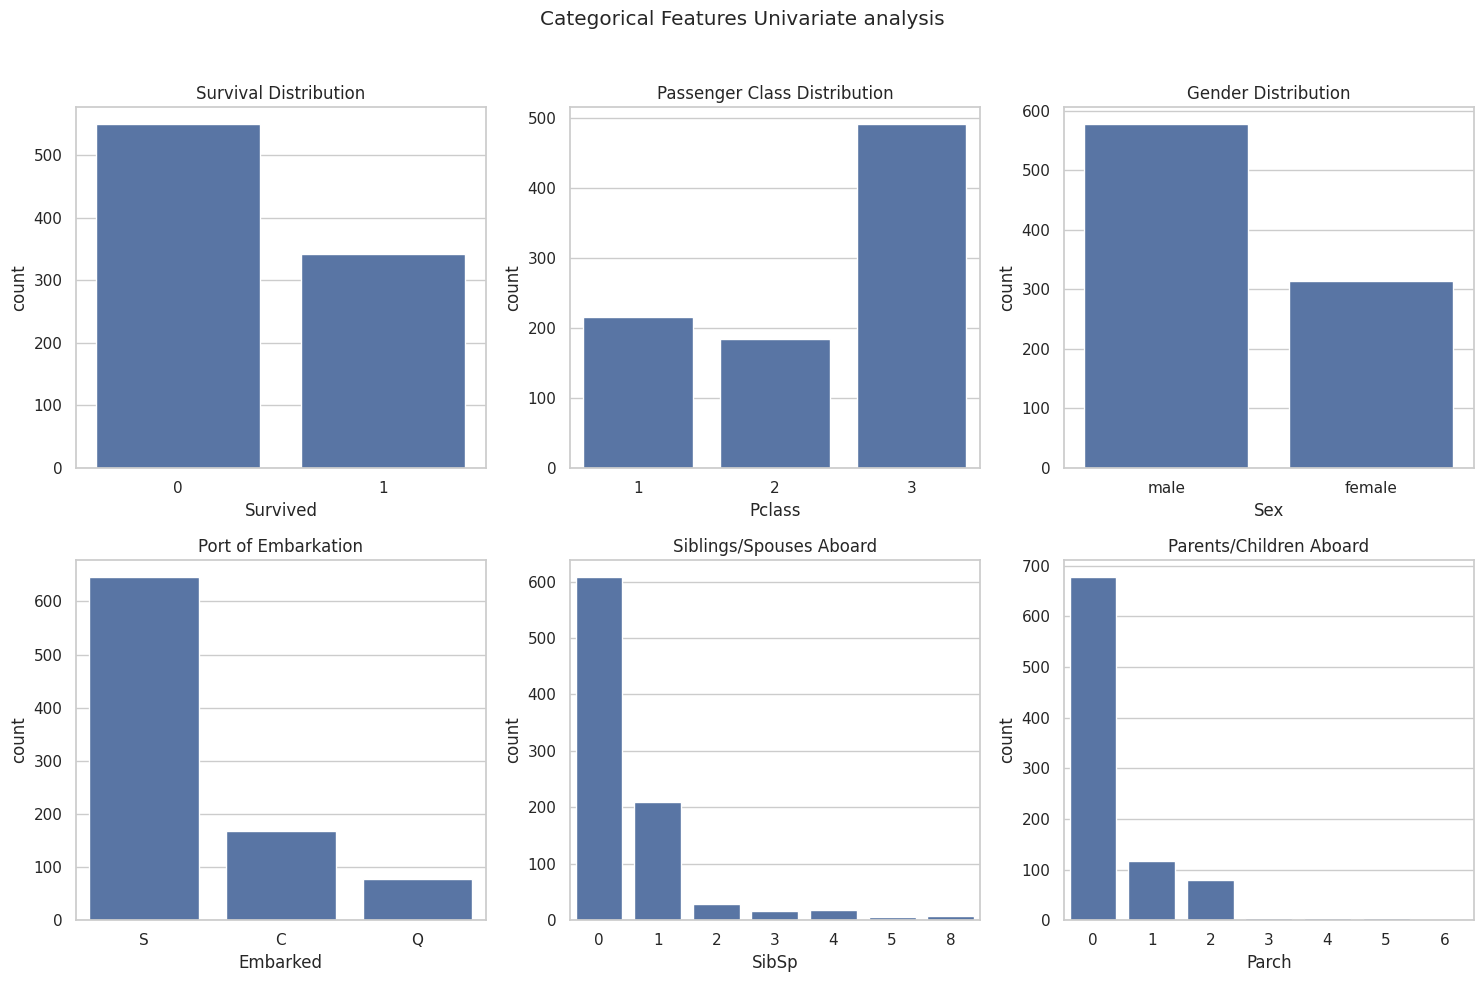

In [48]:
print('Analysing categorical features -: \n')

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Categorical Features Univariate analysis')

sns.countplot(x='Survived', data=df, ax=axes[0, 0]).set_title('Survival Distribution')
sns.countplot(ax=axes[0, 1], x='Pclass', data=df).set_title('Passenger Class Distribution')
sns.countplot(ax=axes[0, 2], x='Sex', data=df).set_title('Gender Distribution')
sns.countplot(ax=axes[1, 0], x='Embarked', data=df).set_title('Port of Embarkation')
sns.countplot(ax=axes[1, 1], x='SibSp', data=df).set_title('Siblings/Spouses Aboard')
sns.countplot(ax=axes[1, 2], x='Parch', data=df).set_title('Parents/Children Aboard')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [49]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Has_Cabin'],
      dtype='object')


Analyzing numerical features:


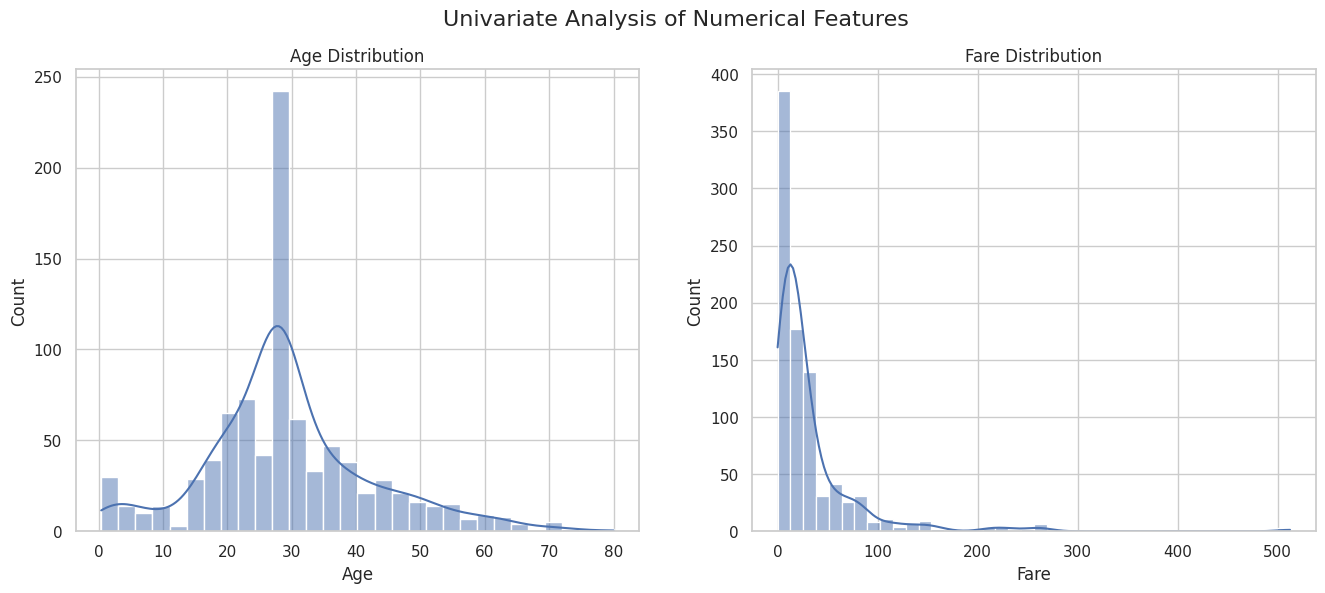

In [51]:
print("\nAnalyzing numerical features:")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Univariate Analysis of Numerical Features', fontsize=16)

# Plotting Age distribution
sns.histplot(ax=axes[0], data=df, x='Age', kde=True, bins=30).set_title('Age Distribution')

# Plotting Fare distribution
sns.histplot(ax=axes[1], data=df, x='Fare', kde=True, bins=40).set_title('Fare Distribution')

plt.show()

### Step 5: Bivariate Analysis

Bivariate Analysis: Feature vs. Survival


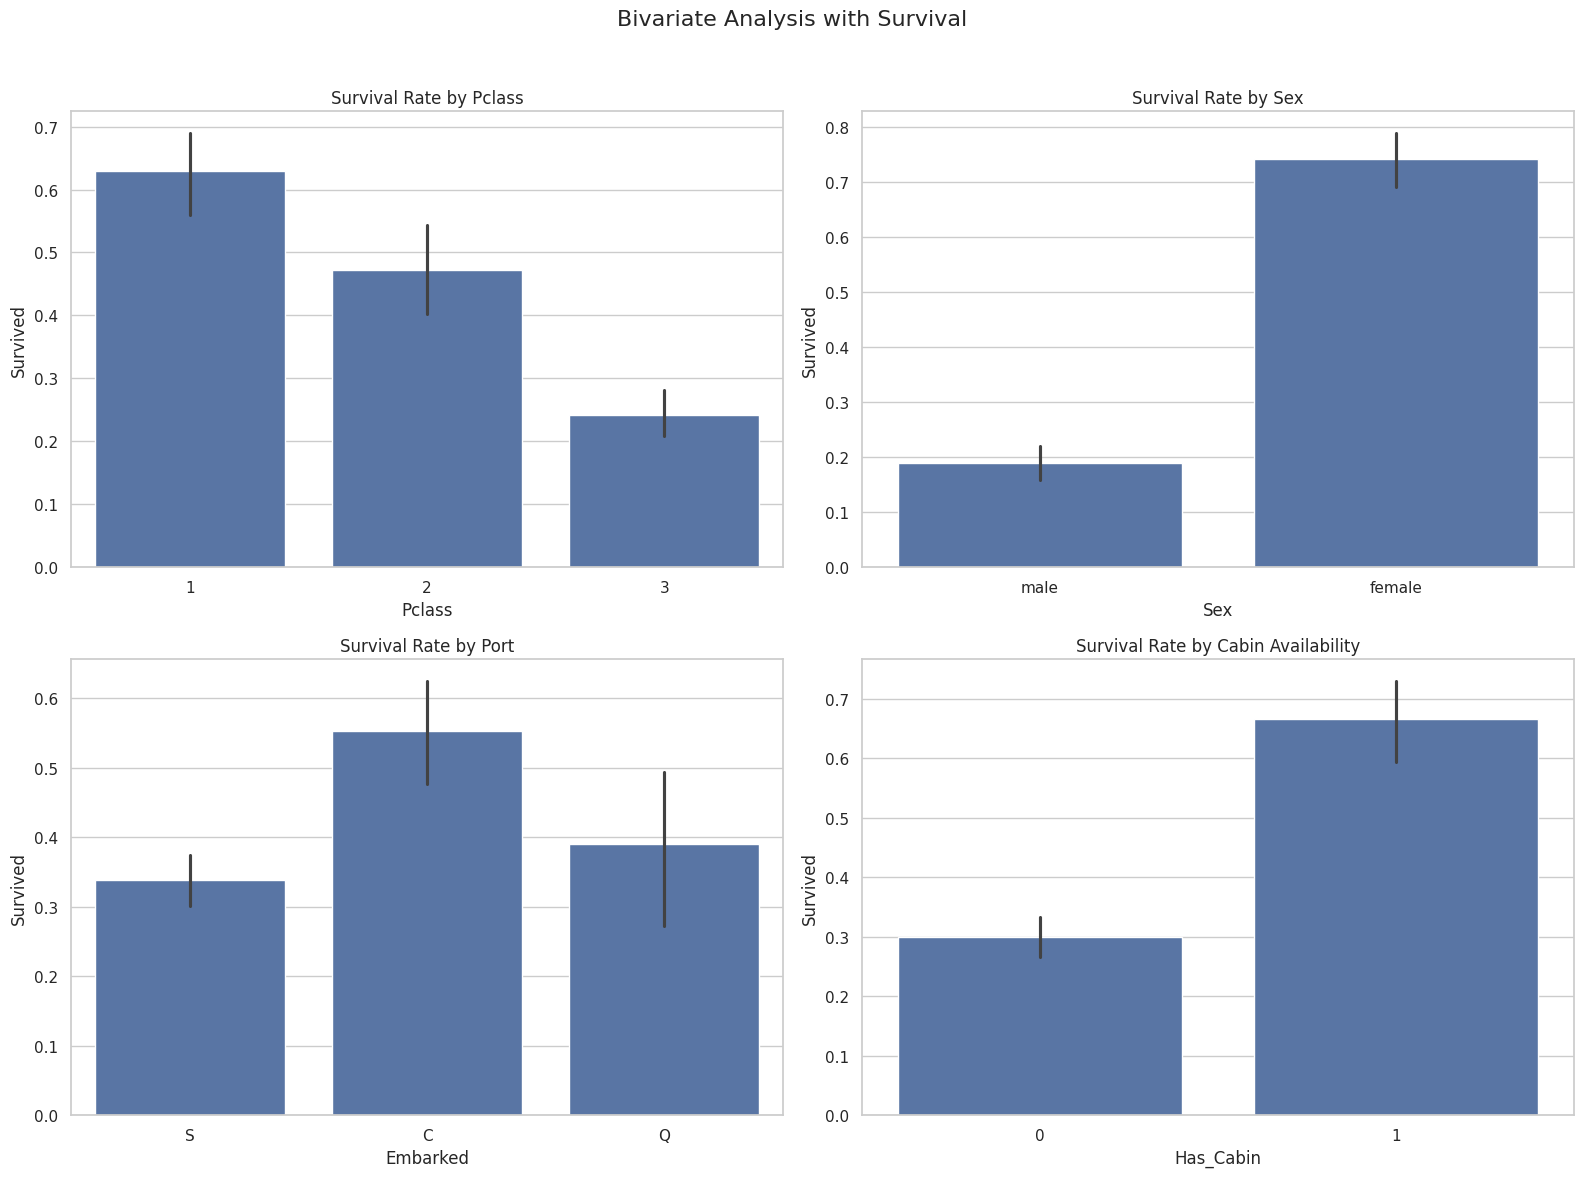

In [52]:
print("Bivariate Analysis: Feature vs. Survival")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Bivariate Analysis with Survival', fontsize=16)

# Pclass vs. Survived
sns.barplot(ax=axes[0, 0], x='Pclass', y='Survived', data=df).set_title('Survival Rate by Pclass')

# Sex vs. Survived
sns.barplot(ax=axes[0, 1], x='Sex', y='Survived', data=df).set_title('Survival Rate by Sex')

# Embarked vs. Survived
sns.barplot(ax=axes[1, 0], x='Embarked', y='Survived', data=df).set_title('Survival Rate by Port')

# Has_Cabin vs. Survived
sns.barplot(ax=axes[1, 1], x='Has_Cabin', y='Survived', data=df).set_title('Survival Rate by Cabin Availability')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

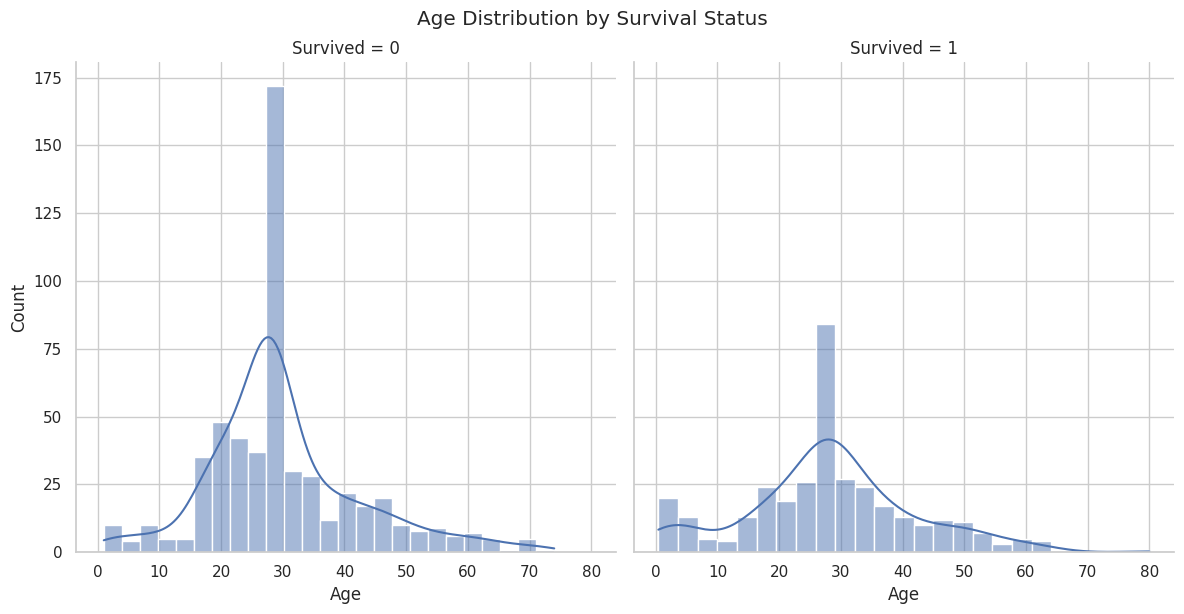

In [53]:
# Age vs. Survival
g = sns.FacetGrid(df, col='Survived', height=6)
g.map(sns.histplot, 'Age', bins=25, kde=True)
plt.suptitle('Age Distribution by Survival Status', y=1.02)
plt.show()

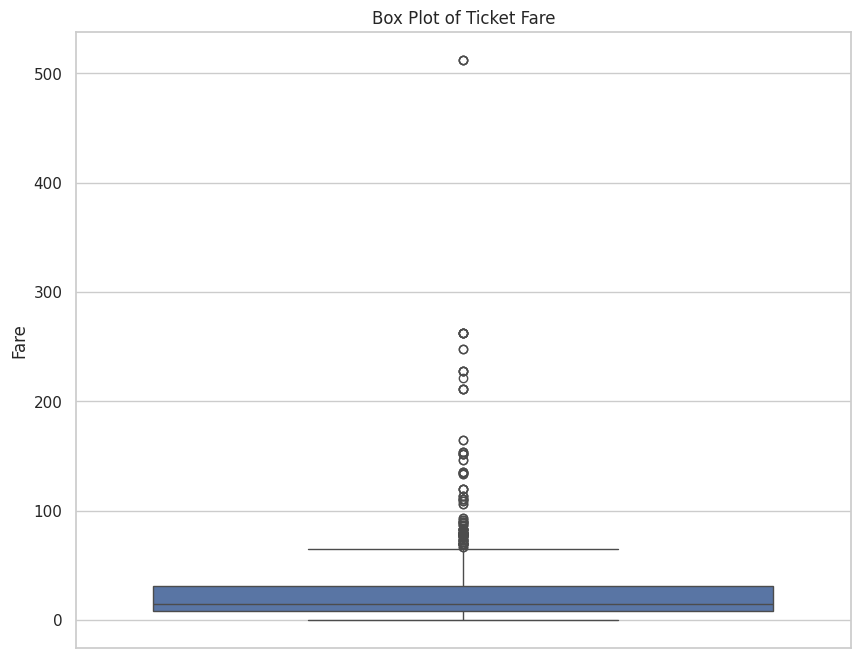

In [55]:
plt.figure(figsize=(10, 8))
sns.boxplot(y='Fare', data=df)
plt.title('Box Plot of Ticket Fare')
plt.ylabel('Fare')
plt.show()

### Feature Engineering

In [57]:
# 1. Create a 'FamilySize' feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # +1 for the person themselves

# 2. Create an 'IsAlone' feature
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

print("Created 'FamilySize' and 'IsAlone' features:")
df[['FamilySize', 'IsAlone']].head()

Created 'FamilySize' and 'IsAlone' features:


,FamilySize,IsAlone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


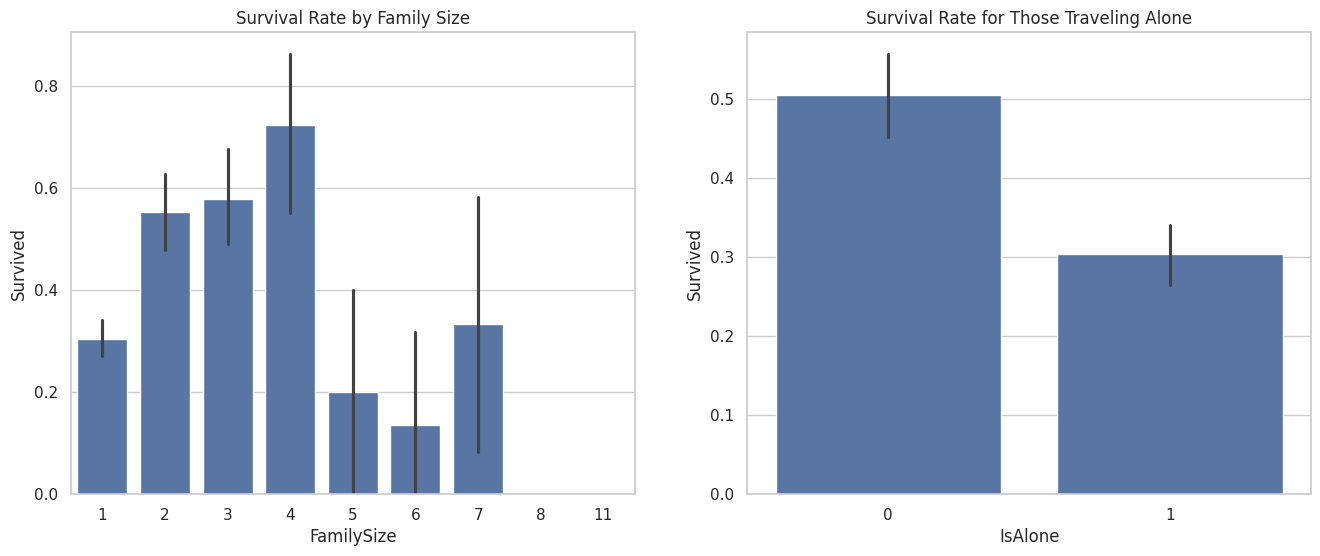

In [58]:
# Analyze the new family-related features against survival
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Survival Rate by FamilySize
sns.barplot(ax=axes[0], x='FamilySize', y='Survived', data=df).set_title('Survival Rate by Family Size')

# Survival Rate by IsAlone
sns.barplot(ax=axes[1], x='IsAlone', y='Survived', data=df).set_title('Survival Rate for Those Traveling Alone')

plt.show()

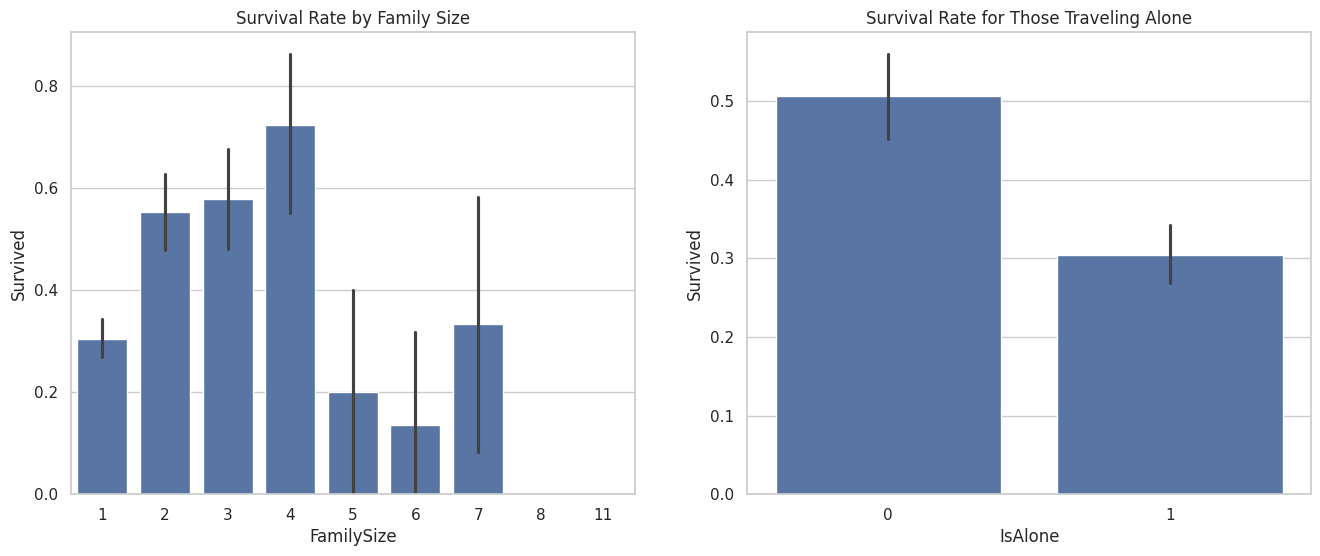

In [59]:
# Analyze the new family-related features against survival
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Survival Rate by FamilySize
sns.barplot(ax=axes[0], x='FamilySize', y='Survived', data=df).set_title('Survival Rate by Family Size')

# Survival Rate by IsAlone
sns.barplot(ax=axes[1], x='IsAlone', y='Survived', data=df).set_title('Survival Rate for Those Traveling Alone')

plt.show()

In [62]:
# 3. Extract 'Title' from the 'Name' column
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Let's see the different titles
print("Extracted Titles:")
df['Title'].value_counts()

Extracted Titles:


,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


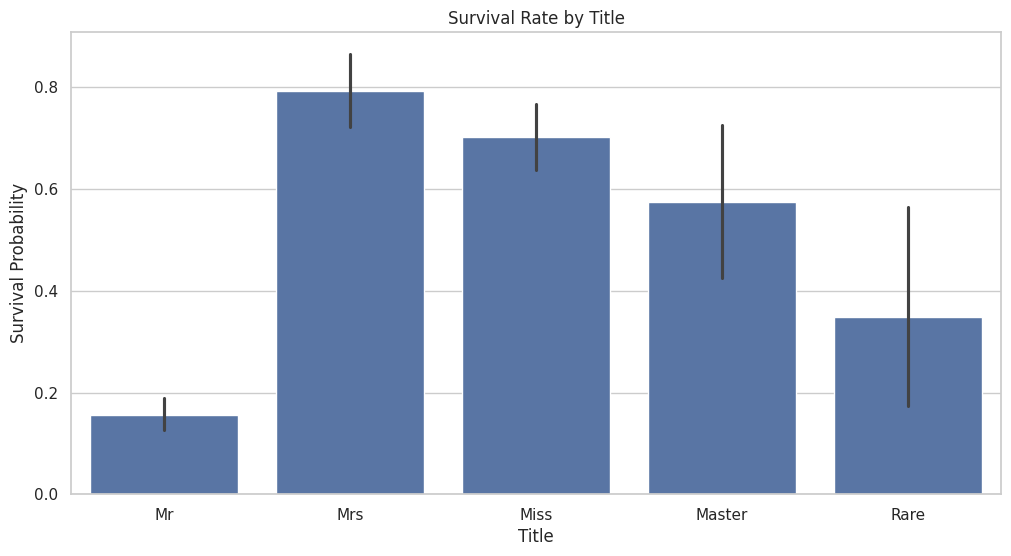

In [64]:
# Simplify the titles by grouping rare ones into a 'Rare' category
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Let's see the survival rate by the new, cleaned titles
plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Survived', data=df)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Probability')
plt.show()

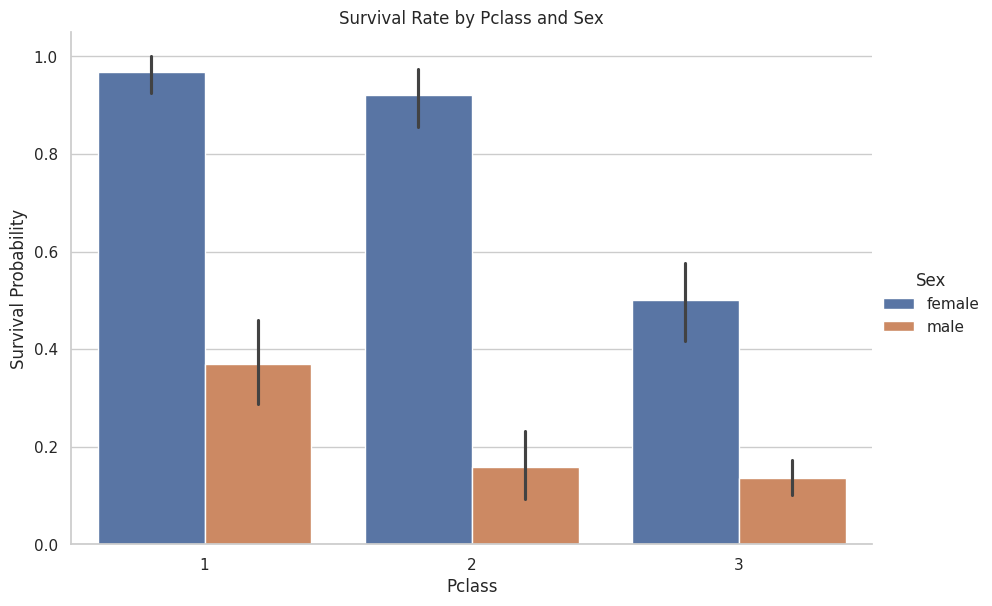

In [65]:
# Survival rate by Pclass and Sex
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='bar', height=6, aspect=1.5)
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel('Survival Probability')
plt.show()

# Insights: Females in all classes had a significantly higher survival rate than males.

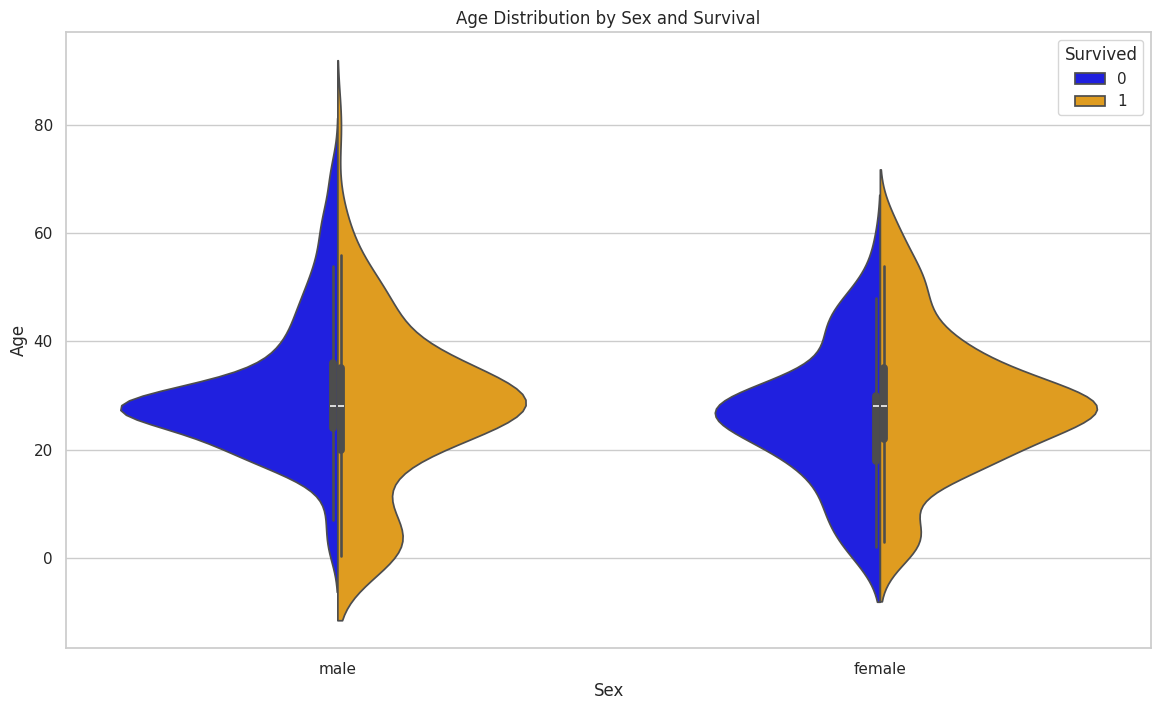

In [66]:
# Violin plot to see age distribution by sex and survival status
plt.figure(figsize=(14, 8))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, palette={0: 'blue', 1: 'orange'})
plt.title('Age Distribution by Sex and Survival')
plt.show()

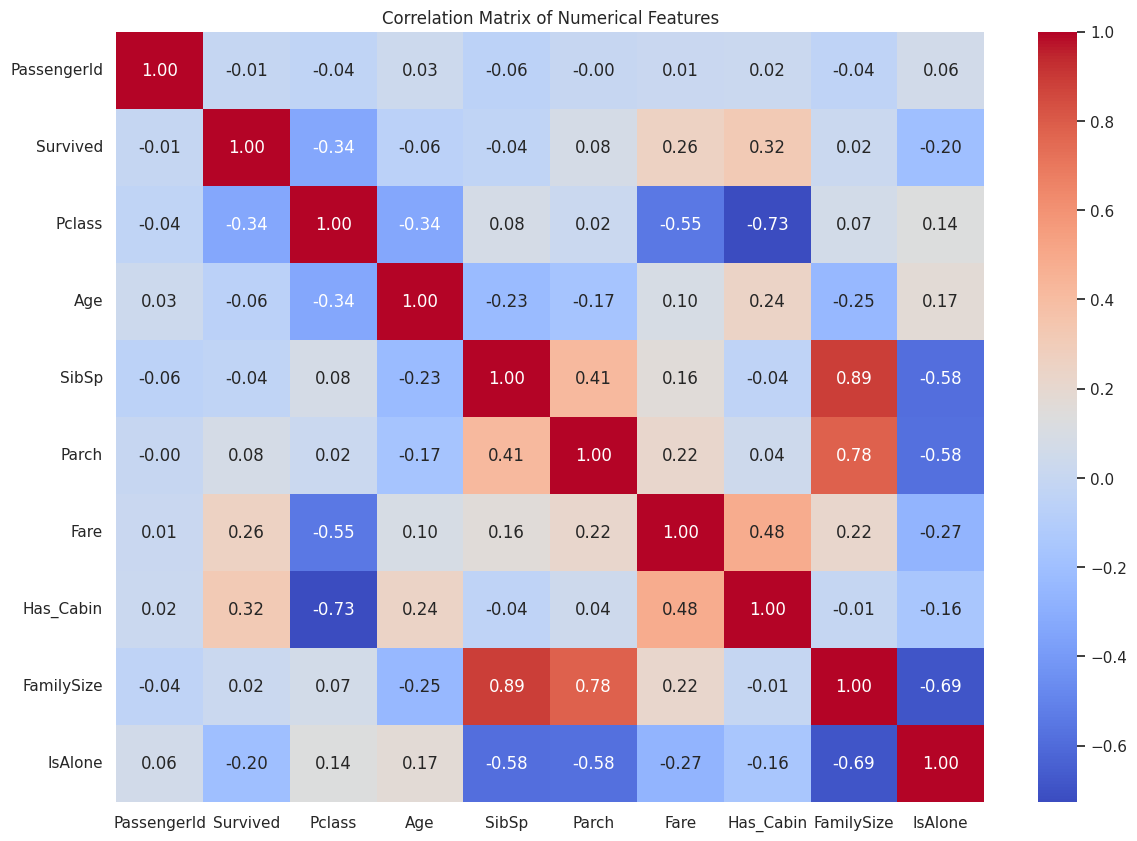

In [68]:
# Correlation Heatmap for numerical features
plt.figure(figsize=(14, 10))
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [69]:
!pip install ydata-profiling -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.5 MB/s eta 0:00:00


In [71]:
# Generate the profiling report
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Titanic Dataset Profiling Report")

# Display the report in the notebook
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

In [72]:
profile.to_file("titanic_data_profiling_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]